In [1]:
import pandas as pd

#csv imports

pl_data = pd.read_csv("PL-data.csv", skiprows=1)
pl_data.head()

uk_data = pd.read_csv("UK-data.csv", skiprows=1)
uk_data.head()

usa_data = pd.read_csv("USA-data.csv", skiprows=1)
usa_data.head()


,Miesiąc,vacation: (Stany Zjednoczone)
0,2004-01,99
1,2004-02,87
2,2004-03,83
3,2004-04,77
4,2004-05,83


In [2]:
# set datetime index

pl_data.index = pd.to_datetime(pl_data['Miesiąc'], format='%Y-%m')
pl_data.drop(columns=['Miesiąc'], inplace=True)
pl_data.head()

uk_data.index = pd.to_datetime(uk_data['Miesiąc'], format='%Y-%m')
uk_data.drop(columns=['Miesiąc'], inplace=True)
uk_data.head()

usa_data.index = pd.to_datetime(usa_data['Miesiąc'], format='%Y-%m')
usa_data.drop(columns=['Miesiąc'], inplace=True)
usa_data.head()

,vacation: (Stany Zjednoczone)
Miesiąc,
2004-01-01,99
2004-02-01,87
2004-03-01,83
2004-04-01,77
2004-05-01,83


In [3]:
# rename columns using country codes (eg. PL) as headers

pl_data.rename(columns={'vacation: (Polska)': 'PL'}, inplace=True)
pl_data.head()

uk_data.rename(columns={'vacation: (Wielka Brytania)': 'UK'}, inplace=True)
uk_data.head()

usa_data.rename(columns={'vacation: (Stany Zjednoczone)': 'USA'}, inplace=True)
usa_data.head()

,USA
Miesiąc,
2004-01-01,99
2004-02-01,87
2004-03-01,83
2004-04-01,77
2004-05-01,83


In [4]:
# Combine the search counts in one dataframe
full_data = pl_data.join(uk_data).join(usa_data)
full_data.head()

,PL,UK,USA
Miesiąc,,,
2004-01-01,0,40,99
2004-02-01,87,37,87
2004-03-01,93,44,83
2004-04-01,100,36,77
2004-05-01,62,37,83


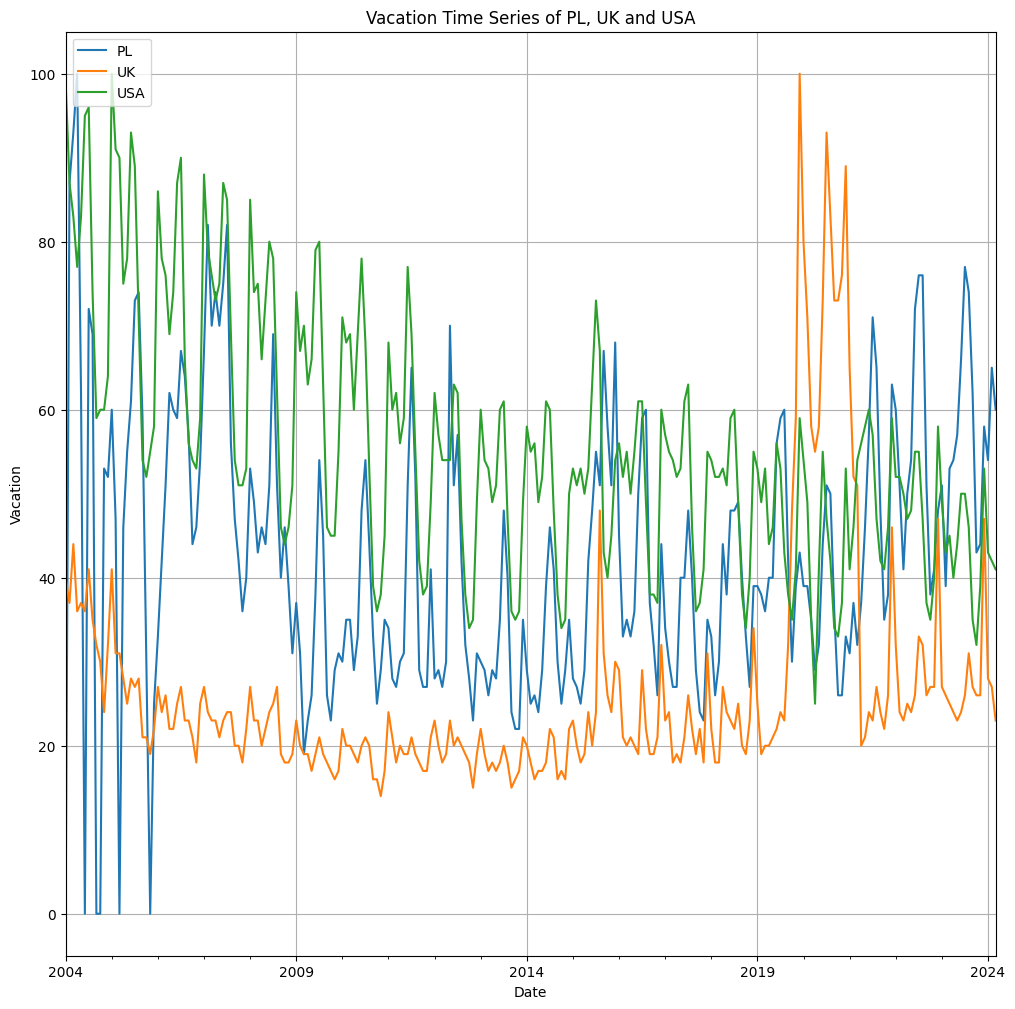

In [9]:
# Present the time series for all countries in one plot
import matplotlib.pyplot as plt

full_data.plot(figsize=(12, 12))
plt.xlabel('Date')
plt.ylabel('Vacation')
plt.title('Vacation Time Series of PL, UK and USA')
plt.grid('True')
plt.legend(loc='upper left')
plt.show()

In [10]:
# Descriptive statistics

full_data.describe()

,PL,UK,USA
count,243.000000,243.000000,243.000000
mean,42.946502,26.687243,55.979424
std,16.829027,14.155896,14.971722
min,0.000000,14.000000,25.000000
25%,30.000000,19.000000,46.000000
50%,40.000000,22.000000,54.000000
75%,53.500000,27.000000,63.000000
max,100.000000,100.000000,100.000000


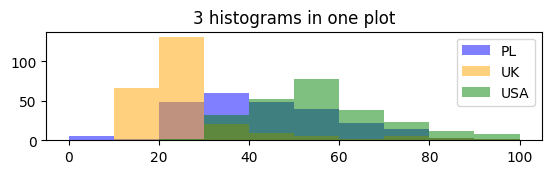

In [37]:
# Show 3 histograms in one plot

plt.subplot(312)
plt.title('3 histograms in one plot')
plt.hist(full_data['PL'], bins=10, range=(0, 100), color='blue', alpha=0.5, label='PL')
plt.hist(full_data['UK'], bins=10, range=(0, 100), color='orange', alpha=0.5, label='UK')
plt.hist(full_data['USA'], bins=10, range=(0, 100), color='green', alpha=0.5, label='USA')
plt.legend()
plt.show()

<Figure size 1000x1000 with 0 Axes>

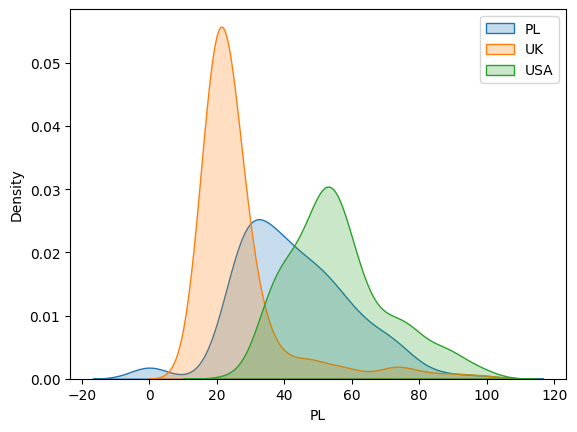

<Figure size 1000x1000 with 0 Axes>

In [20]:
# Show three kernel densities in one plot
import seaborn as sns

sns.kdeplot(data=full_data['PL'], label='PL', fill=True)
sns.kdeplot(data=full_data['UK'], label='UK', fill=True)
sns.kdeplot(data=full_data['USA'], label='USA', fill=True)
plt.legend()
plt.figure(figsize=(10, 10))